# Análisis de los procesos migratorios 2000 - 2019

### PROYECTO TECNOLÓGICO INTEGRADOR ISPC

Integrantes:

* Joaquín Torres
* Leonardo Mansilla
* Daiana Senese

#### Fuente: https://datosmacro.expansion.com/demografia/migracion/inmigracion?anio=2019

#### *La inmigración se define como el cambio de residencia habitual de una persona de un territorio (país) a otro por un periodo que se espera sea al menos de 12 meses. Así pues, cuando hablamos de inmigración e inmigrantes, nos referimos a las personas que entran en un país y nacieron o proceden de otro.*

In [161]:
# se importan las librerias necesarias 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mtick


mpl.style.use('bmh')

In [135]:
# Se importa el CSV generado mediante scraping

df_complete = pd.read_csv(r'/scraping_proyecto_integrador/TSSSM5/csv_2000_to_2019.csv')

## Se realizan distintas operaciones para visualizar la composición del dataframe.

In [136]:
# Cantidad de filas y columnas
df_complete.shape

(1168, 8)

In [137]:
# Encabezado de la tabla y primeros 5 registros.
df_complete.head(5)

,Unnamed: 0,Países,Inmigrantes hombres,Inmigrantes mujeres,Inmigrantes,% Inmigrantes,Var.,year
0,0,España,838.058,819.227,1.657.285,"4,08%","1,52",2000
1,1,Alemania,4.503.666,4.488.965,8.992.631,"10,93%","1,81",2000
2,2,Reino Unido,2.228.628,2.501.537,4.730.165,"8,02%","0,87",2000
3,3,Francia,3.092.789,3.185.929,6.278.718,"10,30%","0,07",2000
4,4,Italia,976.691,1.144.997,2.121.688,"3,72%","0,60",2000


In [138]:
# Nombre de columnas
df_complete.columns

Index(['Unnamed: 0', 'Países', 'Inmigrantes hombres', 'Inmigrantes mujeres',
       'Inmigrantes', '% Inmigrantes', 'Var.', 'year'],
      dtype='object')

In [139]:
# Informacion sobre tipo
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1168 non-null   int64 
 1   Países               1168 non-null   object
 2   Inmigrantes hombres  1168 non-null   object
 3   Inmigrantes mujeres  1168 non-null   object
 4   Inmigrantes          1168 non-null   object
 5   % Inmigrantes        1168 non-null   object
 6   Var.                 1167 non-null   object
 7   year                 1168 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 73.1+ KB


### Se realizan procedimientos para modificar el tipo de datos que contiene el data frame.

In [140]:
# Por cada columna a modificar se realiza un ciclo FOR

# Se reemplazan los "." por espacios vacios.
Inmigrants_total = []
for h in range(len(df_complete["Inmigrantes"])):
    Inmigrants_total.append(int(df_complete["Inmigrantes"][h].replace('.', '')))

# Se reemplazan los "." por espacios vacios.
Inmigrants_m_total = []
for h in range(len(df_complete["Inmigrantes mujeres"])):
    Inmigrants_m_total.append(int(df_complete["Inmigrantes mujeres"][h].replace('.', '')))

# Se reemplazan los "." por espacios vacios.
Inmigrants_h_total = []
for h in range(len(df_complete["Inmigrantes hombres"])):
    Inmigrants_h_total.append(int(df_complete["Inmigrantes hombres"][h].replace('.', '')))

# Se reemplazan los "." y "%" por espacios vacios. 
Inmigrants_porc_total = []
for h in range(len(df_complete['% Inmigrantes'])):
    Inmigrants_porc_total.append(float(df_complete['% Inmigrantes'][h].replace('%', '').replace(',', '.')))

# Se convierte a string los años.
Inmigrants_year_total = []
for h in range(len(df_complete["year"])):
    Inmigrants_year_total.append(str(df_complete["year"][h]))

# Se agregan al DataFrame las columnas corregidas
df_complete["Inmigrantes_total"] = Inmigrants_total
df_complete["Inmigrantes_hombres"] = Inmigrants_m_total
df_complete["Inmigrantes_mujeres"] = Inmigrants_h_total
df_complete["Proporcion_total"] = Inmigrants_porc_total
df_complete["Year"] = Inmigrants_year_total

# Se eliminan las columnas erroneas
df_complete = df_complete.drop(['% Inmigrantes','Inmigrantes hombres','Inmigrantes mujeres', 'Inmigrantes', 'year'], axis=1)


In [141]:
## Mostramos la estructura de la tabla final
df_complete.head(10)

,Unnamed: 0,Países,Var.,Inmigrantes_total,Inmigrantes_hombres,Inmigrantes_mujeres,Proporcion_total,Year
0,0,España,"1,52",1657285,819227,838058,4.08,2000
1,1,Alemania,"1,81",8992631,4488965,4503666,10.93,2000
2,2,Reino Unido,"0,87",4730165,2501537,2228628,8.02,2000
3,3,Francia,"0,07",6278718,3185929,3092789,10.30,2000
4,4,Italia,"0,60",2121688,1144997,976691,3.72,2000
5,5,Portugal,"1,00",651472,331153,320319,6.31,2000
6,6,Estados Unidos,"1,66",34814053,17503268,17310785,12.34,2000
7,7,Japón,"0,24",1686444,889516,796928,1.33,2000
8,8,China,0,508034,253952,254082,0.04,2000
9,9,Andorra,"-5,21",42147,20054,22093,64.01,2000


## Serie de tiempo: total de inmigrantes por año. 

In [153]:
# Se genera un DataFrame agrupando los inmigrantes por año y se eliminan las columnas no necesarias.
cant_year = df_complete.groupby(["Year"]).sum('Inmigrantes_total')
cant_year = cant_year.drop(['Unnamed: 0', 'Proporcion_total'], axis=1)

In [154]:
# Se visualiza la tabla con los datos grupados por año. 
cant_year.head()

,Inmigrantes_total,Inmigrantes_hombres,Inmigrantes_mujeres
Year,,,
2000,172082318,84782451,87299867
2005,189978509,92908862,97069647
2010,219092015,105838993,113253022
2015,247090870,119071564,128019306
2017,255954760,123713547,132241213


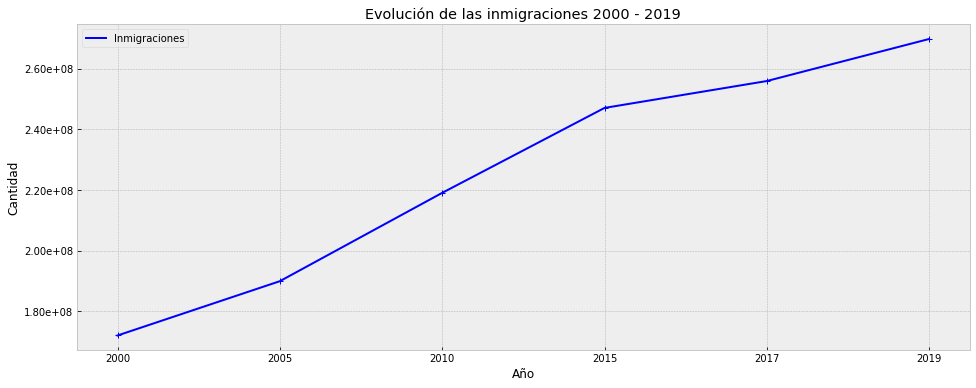

In [163]:
# Se realiza el grafico indexando los años
year_index = cant_year.index

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(year_index, cant_year["Inmigrantes_total"], 'b',  label='Inmigraciones')
ax.plot(year_index, cant_year["Inmigrantes_total"],  'b+')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.set_xlabel('Año')                  
ax.set_ylabel('Cantidad')
ax.set_title('Evolución de las inmigraciones 2000 - 2019')
ax.legend() 

#### **Análisis**: Teniendo registro de los años 2000, 2005, 2010, 2015, 2017, 2019 se pueden ver los aumentos en la inmigración tras los años.

## Nos enfocamos en los años **2000** y **2019**

In [144]:
## Se crea un dataframe con los registros pertenecientes al año 2000
df_2000 = df_complete[df_complete['Year'] == '2000']

## Se crea un dataframe con los registros pertenecientes al año 2019
df_2019 = df_complete[df_complete['Year'] == '2019']


#### El dataframe del año 2000 cuenta con las siguiente cantidad de filas y columnas:

In [145]:
# Cantidad de filas y columnas
df_2000.shape

(194, 8)

#### El dataframe del año 2019 cuenta con las siguiente cantidad de filas y columnas:

In [146]:
# Cantidad de filas y columnas
df_2019.shape

(195, 8)

### Se generan los siguientes gráficos que muestran los 10 paises con mayor inmigración para los años 2000 y 2019

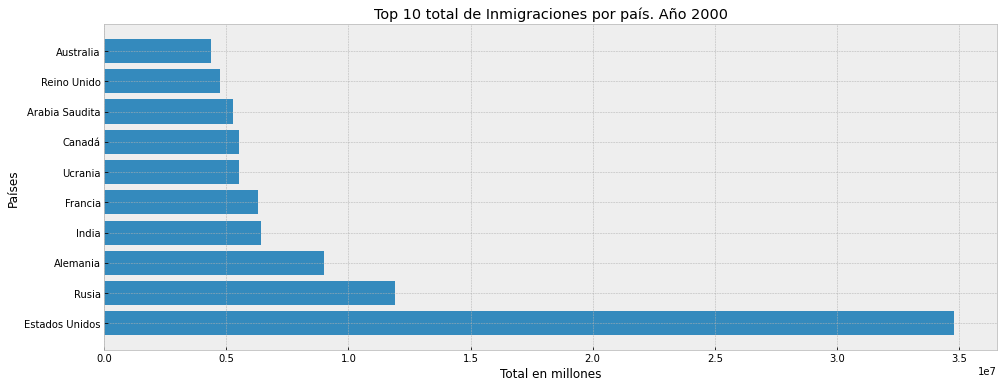

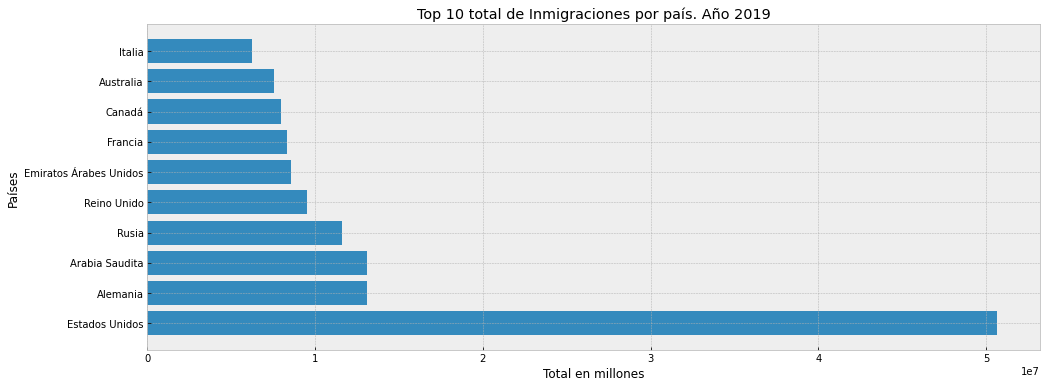

In [148]:
# Para ambos años se ordena el dataframe según cantidad de inmigrantes de orden descendiente.
df_2000 = df_2000.sort_values(by=['Inmigrantes_total'], ascending=False)
top_10_df_2000 = df_2000.head(10)

df_2019 = df_2019.sort_values(by=['Inmigrantes_total'], ascending=False)
top_10_df_2019 = df_2019.head(10)

# Gráfico 2000
fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_df_2000['Países'], top_10_df_2000['Inmigrantes_total'])
ax.set_title('Top 10 total de Inmigraciones por país. Año 2000')
ax.set_ylabel('Países')
ax.set_xlabel('Total en millones')

# Gráfico 2019
fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_df_2019['Países'], top_10_df_2019['Inmigrantes_total'])
ax.set_title('Top 10 total de Inmigraciones por país. Año 2019')
ax.set_ylabel('Países')
ax.set_xlabel('Total en millones')

plt.show()

#### **Análisis**: En ambos años se visualiza que EEUU es el país que lidera con mayor cantidad de inmigrantes. A su vez, Alemania pasa del 3er lugar en 2000 al 2do lugar en 2019. Pero lo más relevante el el ascenso de Arabia Saudita al 3er puesto en 2019 (8vo en 2000) y el caso de Emiratos Árabes que ocupa el 6to lugar en 2019, mientras que en el año 2000 no era parte del Top 10.

## A su vez, se muestran en los siguientes gráficos el TOP 10 paises con mayor proporcion de inmigrantes sobre su población total. 

Text(0.5, 0, 'Proporción total')

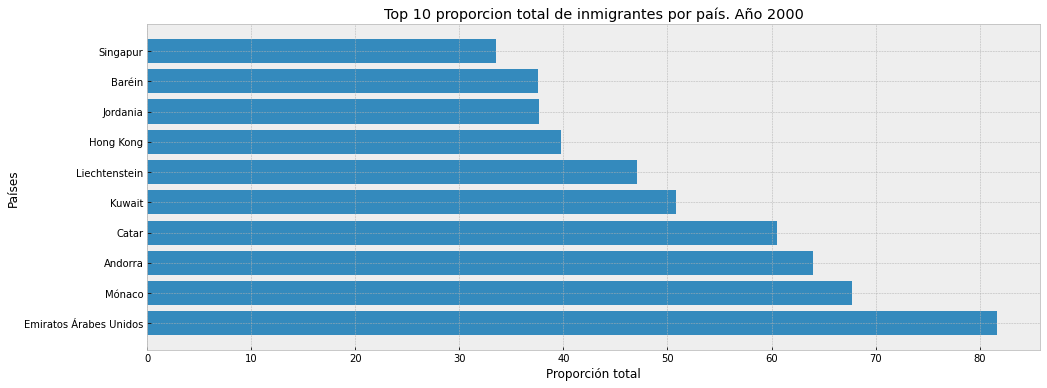

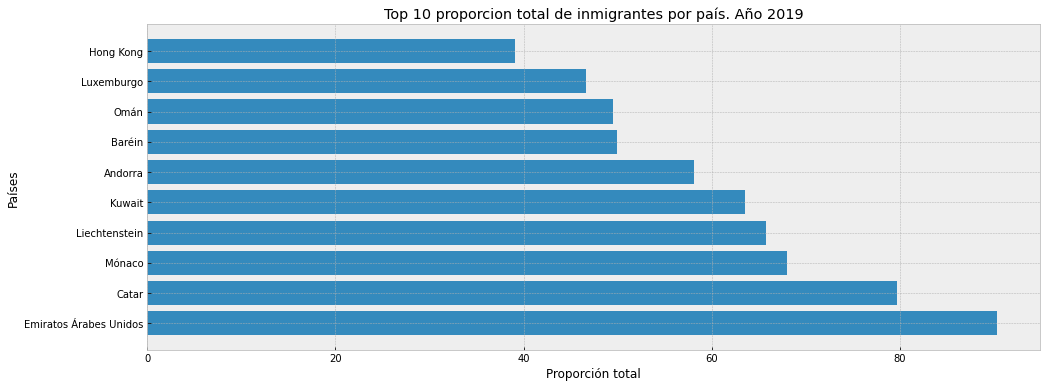

In [159]:
# Para ambos años se ordena el dataframe según la proporción de inmigrantes sobre el total de la población de orden descendiente.

df_2000_sort =df_2000.sort_values(by=['Proporcion_total'], ascending=False)
top_10_prop_inm_2000 = df_2000_sort.head(10)

df_2019_sort =df_2019.sort_values(by=['Proporcion_total'], ascending=False)
top_10_prop_inm_2019 = df_2019_sort.head(10)

# Gráfico 2000
fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_prop_inm_2000['Países'], top_10_prop_inm_2000['Proporcion_total'])
ax.set_title('Top 10 proporcion total de inmigrantes por país. Año 2000')
ax.set_ylabel('Países')
ax.set_xlabel('Proporción total')

# Gráfico 2019
fig, ax = plt.subplots(figsize=(16,6))
ax.barh(top_10_prop_inm_2019['Países'], top_10_prop_inm_2019['Proporcion_total'])
ax.set_title('Top 10 proporcion total de inmigrantes por país. Año 2019')
ax.set_ylabel('Países')
ax.set_xlabel('Proporción total')


#### **Análisis**: En ambos años el pais con mayor proporcion de inmigrantes es Emiratos Árabes, a su vez, Catar de estar en la 4ta posición en el año 2000, en el año 2019 asciende al 2do lugar. Es caracteristico que en ambos años se presentan los paises orientales que tuvieron gran desarrollo economico y crecimiento en las últimas 3 décadas, como a su vez, paises pequeños y principados como Liechtenstein, Andorra y Mónaco.

## En cuanto a la frecuencia de proporción inmigrantes sobre su población total para los años 2000 y 2019 se puede visualizar en los siguientes histogramas:

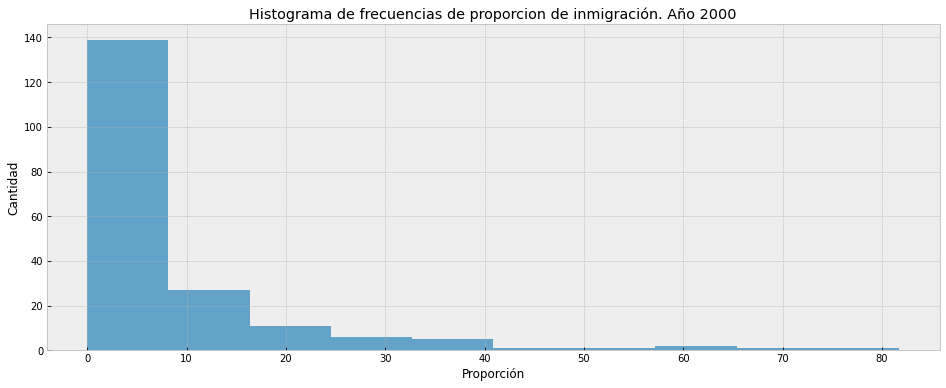

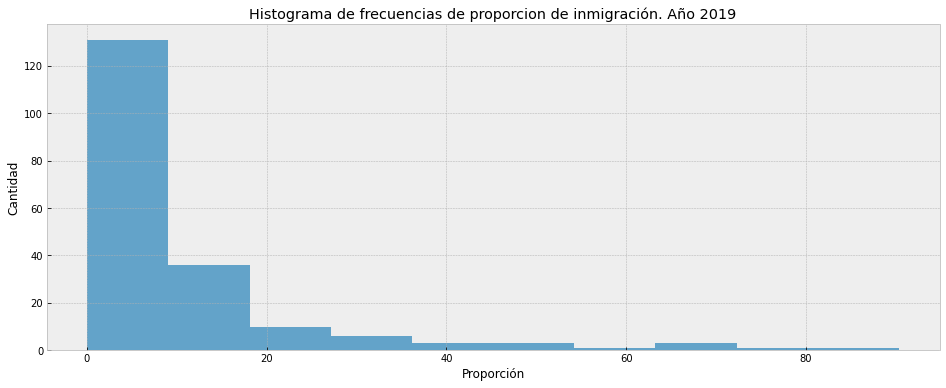

In [170]:
# Gráfico histograma 2000
fig, ax = plt.subplots(figsize=(16,6))
ax.hist(df_2000['Proporcion_total'], 10, alpha=0.75)
ax.xaxis.grid(which='minor', linestyle='dashed', color='gray')
ax.set_xlabel('Proporción')                  
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de frecuencias de proporcion de inmigración. Año 2000')

# Gráfico histograma 2019
fig, ax = plt.subplots(figsize=(16,6))
ax.hist(df_2019['Proporcion_total'],10, alpha=0.75)
ax.xaxis.grid(which='minor', linestyle='dashed', color='gray')
ax.set_xlabel('Proporción')                  
ax.set_ylabel('Cantidad')
ax.set_title('Histograma de frecuencias de proporcion de inmigración. Año 2019')
plt.show()

#### **Análisis**: En cuanto a la distribución de las frecuentes de proporciones, ambos años tienen comportamientos logarítmicos similares. En la mayoria de los paises, los inmigrantes representan menos del 10% de la población local. 

## Nos enfocamos en la situación de **Argentina**

### Cantidad de inmigrantes según año.

In [164]:
# DataFrame con registros de Argentina.
arg_inmig = df_complete[df_complete['Países'] == 'Argentina']
arg_inmig = arg_inmig.drop(['Unnamed: 0'], axis=1)
arg_inmig.head(6)

,Países,Var.,Inmigrantes_total,Inmigrantes_hombres,Inmigrantes_mujeres,Proporcion_total,Year
16,Argentina,"-0,40",1540219,822295,717924,4.19,2000
210,Argentina,"0,15",1673088,898278,774810,4.34,2005
404,Argentina,"0,09",1805957,974261,831696,4.43,2010
599,Argentina,"0,41",2086302,1125992,960310,4.84,2015
794,Argentina,"0,07",2164524,1168208,996316,4.91,2017
989,Argentina,"0,01",2212879,1194306,1018573,4.92,2019


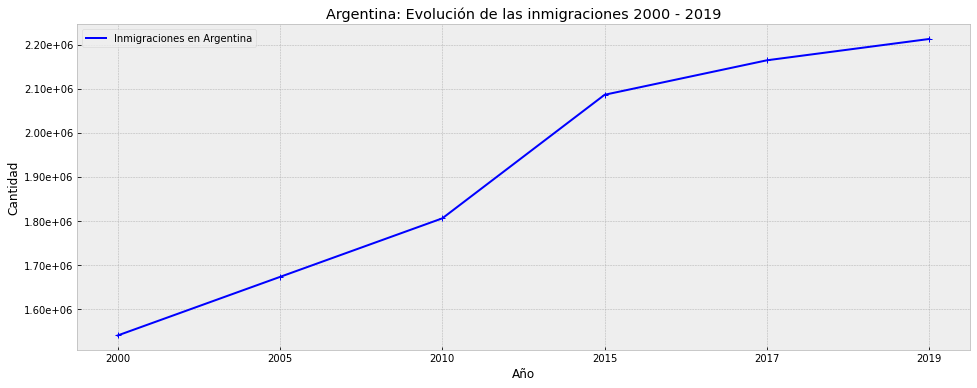

In [167]:
# Gráfico temporal Argentina
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(arg_inmig["Year"], arg_inmig["Inmigrantes_total"], 'b',  label='Inmigraciones en Argentina')
ax.plot(arg_inmig["Year"], arg_inmig["Inmigrantes_total"],  'b+')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax.set_xlabel('Año')                  
ax.set_ylabel('Cantidad')
ax.set_title('Argentina: Evolución de las inmigraciones 2000 - 2019')
ax.legend() 

#### **Análisis**: En lo que respecta a la inmigración total por año en el Argentina, la evolución comparte la tendencia alcista visualizada a nivel mundial. 

### Cantidad de inmigrantes según genero y año en Argentina. 

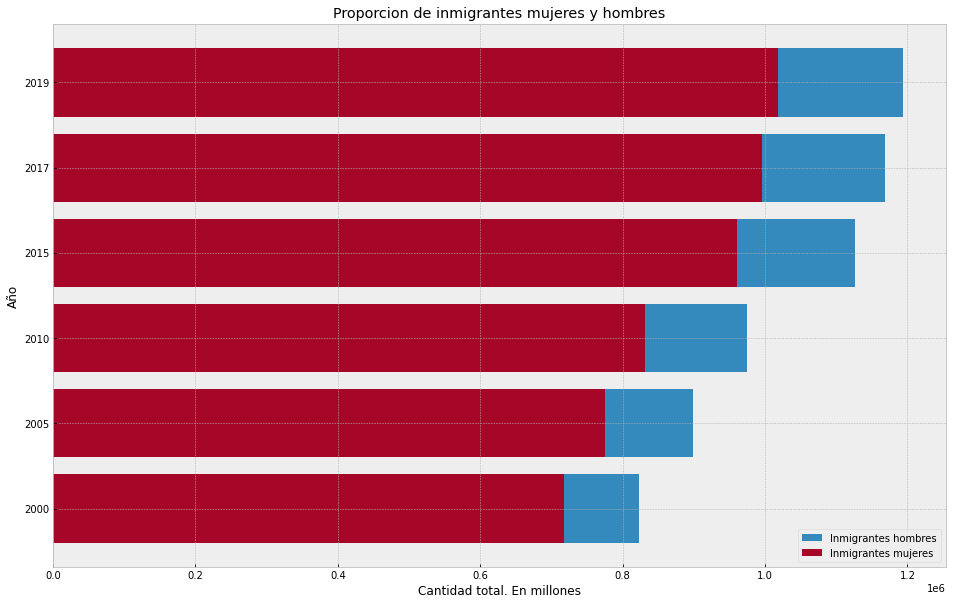

In [168]:
#Grafico de columnas horizontales
fig, ax = plt.subplots(figsize=(16,10))
ax.barh(arg_inmig["Year"], arg_inmig["Inmigrantes_hombres"], label = 'Inmigrantes hombres')
ax.barh(arg_inmig["Year"], arg_inmig["Inmigrantes_mujeres"], label = 'Inmigrantes mujeres')

ax.set_title('Proporcion de inmigrantes mujeres y hombres')
ax.set_ylabel('Año')
ax.set_xlabel('Cantidad total. En millones')
plt.legend()
plt.show()

#### **Análisis**: A su vez visualizamos la cantidad de inmigrantes hombres y mujeres por año. Como se analizó en el anterior gráfico, la tendencia de inmigración es creciente año tras año, aunque se presenta constancia entre la diferencia de inmigrantes hombres con inmigrantes mujeres. 